### 정상성 검정

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('TIGER_반도체.csv')

#df.sort_values(by='날짜', ascending = False)
df.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024.03.21,41215.0,1245.0,40970.0,41350.0,40785.0,1100809.0
1,2024.03.20,39970.0,435.0,39860.0,40065.0,39350.0,156490.0
2,2024.03.19,39535.0,510.0,39690.0,39690.0,39225.0,219040.0
3,2024.03.18,40045.0,120.0,39610.0,40090.0,39565.0,183709.0
4,2024.03.15,39925.0,125.0,39200.0,39925.0,39110.0,269409.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1140 non-null   object 
 1   종가      1140 non-null   float64
 2   전일비     1140 non-null   float64
 3   시가      1140 non-null   float64
 4   고가      1140 non-null   float64
 5   저가      1140 non-null   float64
 6   거래량     1140 non-null   float64
dtypes: float64(6), object(1)
memory usage: 62.5+ KB


In [30]:
# '날짜' 열의 데이터 타입을 datetime으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# '날짜' 열을 기준으로 오름차순으로 정렬
df = df.sort_values(by='날짜')

In [31]:
df = pd.DataFrame(df[['날짜', '종가']])
df.head()

,날짜,종가
1139,2019-08-07,18805.0
1138,2019-08-08,19140.0
1137,2019-08-09,19270.0
1136,2019-08-12,19400.0
1135,2019-08-13,19410.0


#### ADF Test

In [32]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries, pvalue = 0.05, regression_option = 'ct'):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput[1] < pvalue:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.")
    else:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성을 보장하지 못합니다.")

# adf 함수를 통해 출력
adf_test(df['종가'])


Results of Dickey-Fuller Test:
Test Statistic                   -1.934302
p-value                           0.636714
Lags Used                         0.000000
Number of Observations Used    1139.000000
Critical Value (1%)              -3.966740
Critical Value (5%)              -3.414352
Critical Value (10%)             -3.129323
dtype: float64
정상시계열이 아니라는 귀무가설을 5.0%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성을 보장하지 못합니다.


#### KPSS Test

In [33]:
def kpss_test(timeseries, pvalue = 0.05, regression_option = 'ct'):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression= regression_option)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    if kpss_output[1] < pvalue:
        print(f"정상시계열이 맞다는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성을 보장하지 못합니다.")
    else:
        print(f"정상시계열이 맞다는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성이 보장됩니다.")


kpss_test(df['종가'])

Results of KPSS Test:
Test Statistic            0.703368
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
정상시계열이 맞다는 귀무가설을 5.0%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성을 보장하지 못합니다.


<ipython-input-33-a8dbc792a68e>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression= regression_option)


### 차분을 이용해 정상성 보장

In [45]:
df['diff_5'] = df['종가'].pct_change(5)
df = df.dropna()

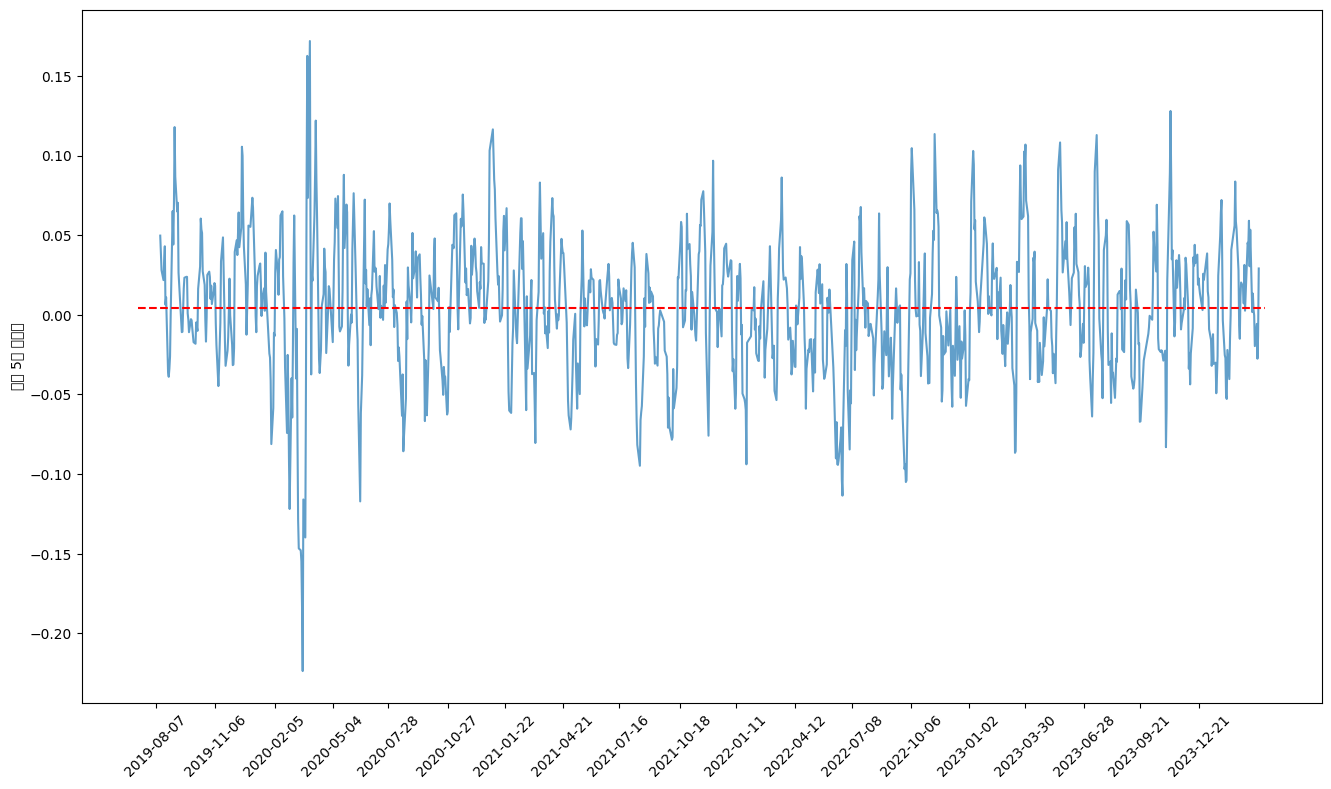

In [43]:
import matplotlib.dates as mdates

data = df['diff_5']

xmin = '2019-07-11'
xmax = '2024-03-31'

xmin_date = pd.to_datetime(xmin)
xmax_date = pd.to_datetime(xmax)

# 날짜를 matplotlib의 날짜 형식으로 변환
xmin_mpl = mdates.date2num(xmin_date)
xmax_mpl = mdates.date2num(xmax_date)

plt.figure(figsize=(16,9))
plt.plot(df['날짜'], data.values, alpha=0.7)
plt.hlines(y=data.mean(), xmin=xmin_mpl, xmax=xmax_mpl, colors='red', linestyles='dashed')
plt.xticks(df['날짜'][::60], rotation = 45)
plt.ylabel('종가 5일 변화율')
g = plt.show()

#### 차분된 데이터로 정상성 확인

In [47]:
adf_test(df['diff_5'])

Results of Dickey-Fuller Test:
Test Statistic                -6.667883e+00
p-value                        7.855068e-08
Lags Used                      2.100000e+01
Number of Observations Used    1.113000e+03
Critical Value (1%)           -3.966927e+00
Critical Value (5%)           -3.414442e+00
Critical Value (10%)          -3.129376e+00
dtype: float64
정상시계열이 아니라는 귀무가설을 5.0%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.


In [48]:
kpss_test(df['diff_5'])

Results of KPSS Test:
Test Statistic            0.126068
p-value                   0.086911
Lags Used                15.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
정상시계열이 맞다는 귀무가설을 5.0%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성이 보장됩니다.
